#  PRUEBAS
Responble: Oscar Fernandez

Usuario: OFERNA4
Repositorio: https://github.com/adldigitallabs/data-bbog-integration-bau-adquisicion/

In [1]:
import os
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.raw.nodes as raw
import data_bbog_integration_fabrica_personas.pipelines.primary.nodes as primary
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
import data_bbog_integration_fabrica_personas.pipelines.model_input.nodes as mi
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.model_output.nodes as mo

In [2]:
import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import pandas as pd
import time

from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [3]:
%load_ext kedro.ipython

[01/10/25 18:48:09] INFO     Resolved project path as:                                              ]8;id=472435;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=742785;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/10/25 18:48:11] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=144743;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=547453;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=972639;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=225114;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=96538;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=611040;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=545269;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=323355;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[01/10/25 18:48:12] INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=256942;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=524630;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=123944;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=133546;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [4]:
params1= catalog.list
params = catalog.load("parameters")
#params

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=135770;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=515652;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [5]:
import logging
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [6]:
create_feature = catalog.load("master_primary_fp")
create_feature.head()

                    INFO     Loading data from 'master_primary_fp' (ParquetDataSet)...          ]8;id=440443;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=880288;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

,hashvalue1,periodo,generacion,estrato,departamento,ocupacion,perfil_riesgo,mcro_sum_numero_cuotas_total,aa_ciudad,mar_status,...,veh_cant_prev,veh_sum_saldo_promedio,veh_prom_plazo,veh_sum_numero_cuotas_pagadas,veh_sum_numero_cuotas_total,veh_sum_cuota_pactada,fid_cant_prev,fid_cant,fid_sum_encargo,cdt_target_ap_group3
0,CC1000000545,202308,_millennial,0,bogota_d_c_,empleado_privado,1.0,0,_,s,...,0,0.0,0.0,0,0,0,0,0,0,0.0
1,CC1000000563,202308,_centennial,0,bogota_d_c_,empleado_privado,1.0,0,_,s,...,0,0.0,0.0,0,0,0,0,0,0,0.0
2,CC1000003981,202308,_millennial,2,bogota_d_c_,empleado_privado,1.0,0,_,s,...,0,0.0,0.0,0,0,0,0,0,0,0.0
3,CC1000018656,202308,_centennial,0,bogota_d_c_,empleado_privado,1.0,0,_,s,...,0,0.0,0.0,0,0,0,0,0,0,0.0
4,CC1000020446,202308,_centennial,0,bogota_d_c_,empleado_privado,1.0,0,_,s,...,0,0.0,0.0,0,0,0,0,0,0,0.0


## Creacion de variables

In [7]:
print(create_feature.shape)
create_feature = feature.calculate_new_variables_pd(create_feature, params)
model_homolog = feature.modelo_homologacion_regiones(params)
create_feature = feature.homologate_region(create_feature, model_homolog)

(28110462, 255)


[01/10/25 18:55:49] INFO     Se construyo la variable "mes" con exito!                                  ]8;id=708196;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=34554;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

[01/10/25 18:56:15] INFO     Se construyo la variable "AAAA" con exito!                                 ]8;id=944511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=182376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

[01/10/25 18:56:16] INFO     Se construyo la variable "sum_saldo_activos" con exito!                    ]8;id=841765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=523845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "sum_saldo_pasivos" con exito!                    ]8;id=563400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=735827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

[01/10/25 18:56:17] INFO     Se construyo la variable "delta_ah_sum_monto_trx_credito" con exito!       ]8;id=38353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=917969;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_debito" con exito!        ]8;id=780747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=394015;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

[01/10/25 18:56:18] INFO     Se construyo la variable "delta_tc_sum_facturacion_total" con exito!       ]8;id=541590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=345527;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

[01/10/25 18:56:19] INFO     Se construyo la variable "num_activos_prev" con exito!                     ]8;id=67738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=765707;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_pasivos_prev" con exito!                     ]8;id=592471;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=549308;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

[01/10/25 18:56:20] INFO     Se construyo la variable "num_prod_activos" con exito!                     ]8;id=202863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=409465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_prod_pasivos" con exito!                     ]8;id=23844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=116898;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Nuevas variables calculadas completamente. Dimension de la data:           ]8;id=183423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=923730;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#89\89]8;;\
                             (28110462, 266)                                                                       

                    INFO     Guardando el pickle de como se homologan las regiones...                  ]8;id=389915;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=941900;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#103\103]8;;\

[01/10/25 18:57:02] INFO     La nulidad se remplazara con Other_Region antes de la capa de model_input ]8;id=67238;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=532411;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#140\140]8;;\

[01/10/25 18:57:07] INFO     Ok la homologacion de la variable region con departamento                 ]8;id=444812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=406653;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#143\143]8;;\

                    INFO     Tamaño de la data: (28110462, 267)                                        ]8;id=993616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=674600;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#145\145]8;;\

## Eliminando variables no relevantes

In [8]:
print(f'Variables a eliminar inicialmente ')
params['cols_to_drop']

Variables a eliminar inicialmente 


['aa_ciudad', 'segmento_cliente', 'mono_multi_prod', 'seg_comercial']

In [9]:
print('Configurando las variables que no vamos a quitar de las definidas para eliminar')
no_dropp = ['periodo','departamento','mar_status','ocupacion']
no_dropp

Configurando las variables que no vamos a quitar de las definidas para eliminar


['periodo', 'departamento', 'mar_status', 'ocupacion']

In [10]:
print('Añadiendo otras columnas para eliminar')
add_drop = ['tipo_id']
add_drop

Añadiendo otras columnas para eliminar


['tipo_id']

In [11]:
lista_drops = params['cols_to_drop']
for col in no_dropp:
    if col in lista_drops:
        lista_drops.remove(col)
params['cols_to_drop'] = list(set(lista_drops+add_drop))
print('Columnas a eliminar del analisis:')
params['cols_to_drop']

Columnas a eliminar del analisis:


['tipo_id', 'mono_multi_prod', 'seg_comercial', 'aa_ciudad', 'segmento_cliente']

In [12]:
print(create_feature.shape)
create_feature = feature.eliminar_columnas(create_feature, params)
print(create_feature.shape)

(28110462, 267)


                    INFO     Segun la parametrizacion de la Fabrica se eliminara: ['mono_multi_prod',  ]8;id=909808;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=717376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#169\169]8;;\
                             'seg_comercial', 'aa_ciudad', 'segmento_cliente']                                     

[01/10/25 18:57:34] INFO     Tamaño de mi df: (28110462, 263)                                          ]8;id=80953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=195593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#172\172]8;;\

(28110462, 263)


**Otras columnas eliminadas manualmente:**

In [13]:
for col in create_feature:
    try:
        if (col.split("_")[1] == 'target') or (col in dropping):
           if (params['target'] != col) or (col in dropping):
               print('Eliminando: ',col) 
               create_feature.drop(col, axis = 1, inplace = True)
    except:
        pass

##### Preprocesamiento de datos

In [19]:
method = {'Outliers':{'Hacer_transformacion' : True,
                      'Sugerir_procesamiento' : True,
                      'method' : 'IQR',#Z-Score, IQR
                      'umbral' : 0.1 }}

method['id'] = params['id']
method['target'] = params['target']

In [20]:
res = mi.treatment_outliers(create_feature,method)
res.T

                    INFO     Iniciando la identificacion de outliers y definiendo como se              ]8;id=247210;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=868042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#229\229]8;;\
                             transformaran los datos                                                               

[01/09/25 20:12:09] INFO     Detectando variables altamente dispersas ...                              ]8;id=265752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=690472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#250\250]8;;\

[01/09/25 20:14:50] INFO     Transformacion de nulos:                                                  ]8;id=745643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=743502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#286\286]8;;\

                    INFO     ['log' 'sqrt' 'sqrt3']                                                    ]8;id=975228;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=904266;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#287\287]8;;\

columns,perfil_riesgo,mcro_sum_numero_cuotas_total,fac_cant,fac_sum_numero_cuotas_pagadas,fac_prom_plazo,fac_cant_prev,fac_sum_numero_cuotas_total,fac_sum_pago_acumulado,fac_sum_saldo_corte,fac_sum_intereses,...,fid_cant_prev,fid_cant,fid_sum_encargo,sum_saldo_activos,sum_saldo_pasivos,delta_ah_sum_monto_trx_credito,delta_ah_sum_monto_trx_debito,delta_tc_sum_facturacion_total,num_pasivos_prev,num_prod_pasivos
Method,log,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt3,...,sqrt,sqrt,sqrt,sqrt3,sqrt3,sqrt3,sqrt3,sqrt3,sqrt,sqrt


In [21]:
display(create_feature[res.index].head(3))

,perfil_riesgo,mcro_sum_numero_cuotas_total,fac_cant,fac_sum_numero_cuotas_pagadas,fac_prom_plazo,fac_cant_prev,fac_sum_numero_cuotas_total,fac_sum_pago_acumulado,fac_sum_saldo_corte,fac_sum_intereses,...,fid_cant_prev,fid_cant,fid_sum_encargo,sum_saldo_activos,sum_saldo_pasivos,delta_ah_sum_monto_trx_credito,delta_ah_sum_monto_trx_debito,delta_tc_sum_facturacion_total,num_pasivos_prev,num_prod_pasivos
0,1.0,0,0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,39509.0,1.251402e+06,0.0,0.0,0.0,0,0
1,1.0,0,0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,461450.0,2.997884e+06,0.0,0.0,0.0,0,0
2,1.0,0,0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,10103960.0,1.992428e+07,0.0,0.0,0.0,0,0


In [22]:
create_feature2 = mi.adj_outliers(create_feature,res, method)
print(create_feature.shape)
print(create_feature2.shape)

[01/09/25 20:15:08] INFO     Comenzado a transformar los datos                                         ]8;id=917885;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=546379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#311\311]8;;\

(28111985, 263)
(28111985, 255)


In [23]:
display(create_feature2[res.index].head(3))

,perfil_riesgo,mcro_sum_numero_cuotas_total,fac_cant,fac_sum_numero_cuotas_pagadas,fac_prom_plazo,fac_cant_prev,fac_sum_numero_cuotas_total,fac_sum_pago_acumulado,fac_sum_saldo_corte,fac_sum_intereses,...,fid_cant_prev,fid_cant,fid_sum_encargo,sum_saldo_activos,sum_saldo_pasivos,delta_ah_sum_monto_trx_credito,delta_ah_sum_monto_trx_debito,delta_tc_sum_facturacion_total,num_pasivos_prev,num_prod_pasivos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,34.059009,107.761987,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,77.275451,144.191036,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,216.187480,271.098788,0.0,0.0,0.0,0.0,0.0


In [24]:
create_feature2 = pd.concat([create_feature2,create_feature[create_feature.columns[~create_feature.columns.isin(create_feature2.columns)]]], axis = 1)
create_feature2

,periodo,estrato,perfil_riesgo,mcro_sum_numero_cuotas_total,antiguedad_meses,edad_anios,nivel_educativo,fac_cant,fac_sum_numero_cuotas_pagadas,fac_prom_plazo,...,num_prod_activos,num_prod_pasivos,hashvalue1,generacion,departamento,ocupacion,mar_status,grupo_etario,tc_target_ap_group3,region
0,202308,0,0.000000,0.0,5,24,2.0,0.0,0.0,0.0,...,1,0.0,CC1000000545,_millennial,bogota_d_c_,empleado_privado,s,_joven,0.0,Region_Central
1,202308,0,0.000000,0.0,32,22,2.0,0.0,0.0,0.0,...,1,0.0,CC1000000563,_centennial,bogota_d_c_,empleado_privado,s,_joven,0.0,Region_Central
2,202308,2,0.000000,0.0,26,25,2.0,0.0,0.0,0.0,...,1,0.0,CC1000003981,_millennial,bogota_d_c_,empleado_privado,s,_joven,0.0,Region_Central
3,202308,0,0.000000,0.0,18,22,2.0,0.0,0.0,0.0,...,1,0.0,CC1000018656,_centennial,bogota_d_c_,empleado_privado,s,_joven,0.0,Region_Central
4,202308,0,0.000000,0.0,5,22,2.0,0.0,0.0,0.0,...,1,0.0,CC1000020446,_centennial,bogota_d_c_,empleado_privado,s,_joven,0.0,Region_Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31125772,202407,3,0.000000,0.0,27,30,4.0,0.0,0.0,0.0,...,0,0.0,CC1023939084,_millennial,bogota_d_c_,empleado_privado,s,_adulto,1.0,Region_Central
31125775,202407,3,0.000000,0.0,265,29,2.0,0.0,0.0,0.0,...,1,1.0,CC1094275784,_millennial,bogota_d_c_,empleado_privado,s,_adulto,1.0,Region_Central
31125783,202407,4,0.000000,0.0,71,24,2.0,0.0,0.0,0.0,...,1,0.0,CC1193603050,_centennial,bogota_d_c_,estudiante,s,_joven,1.0,Region_Central
31125794,202407,5,0.693147,0.0,149,63,2.0,0.0,0.0,0.0,...,1,0.0,CC63289012,_baby_boomer,santander,empleado_privado,s,_persona_mayor,1.0,Region_Andina


## Analisis de Relaciones en las variables

In [14]:
def convergence(data,window_size):
    suave = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    # El último valor de `suave` podría ser tu punto de convergencia
    punto_convergencia = suave[-1]
    return punto_convergencia

def metodo_silueta_codo(X,k_values):
    # Calcular el coeficiente de silueta para diferentes valores de k
    silhouette_scores = []
    code_scores = []
    models_k = []
    for k in k_values:
        ini = time.time()
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(X)
        code_scores.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        models_k.append(k)
        fin = time.time()
        print(k,fin-ini)
    
    # Graficar el método de silueta
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Método de Silueta')
    plt.show()
    # Graficar el método del codo
    plt.plot(k_values, code_scores, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Suma de Errores Cuadráticos (SSE)')
    plt.title('Método del Codo')
    plt.show()
    return silhouette_scores,code_scores,models_k

#%%time
#silhouette_scores,code_scores,models_k = metodo_silueta_codo(X,list(range(2,15,2)))

**PCA Function**

In [15]:
def PCA_m(X,umbral=0.9):
    n = X.shape[1]
    for i in range(2):
        print("Numero de componentes: ",n)
        pca_model = PCA(n_components=n)
        X_reduced = pca_model.fit_transform(X)
        # Obtener la varianza explicada acumulada
        varianza_acumulada = np.cumsum(pca_model.explained_variance_ratio_)
        varianza_acumulada = np.array(varianza_acumulada)
        n = len(varianza_acumulada[varianza_acumulada<umbral])
        # Mostrar la varianza acumulada
        print(varianza_acumulada)
    return X_reduced,pca_model

def metodo_silueta_codo(X,k_values):
    X_reduced,pca_model = PCA_m(X)
    # Calcular el coeficiente de silueta para diferentes valores de k
    silhouette_scores = []
    code_scores = []
    models_k = []
    for k in k_values:
        ini = time.time()
        kmeans = MiniBatchKMeans(n_clusters=k, batch_size = int(X_reduced.shape[0]*(1/8))) # 2 veces mas rapido
        cluster_labels = kmeans.fit_predict(X_reduced)
        code_scores.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X_reduced, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        models_k.append(k)
        fin = time.time()
        print(k,fin-ini)
    
    # Graficar el método de silueta
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Método de Silueta')
    plt.show()
    # Graficar el método del codo
    plt.plot(k_values, code_scores, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Suma de Errores Cuadráticos (SSE)')
    plt.title('Método del Codo')
    plt.show()
    return silhouette_scores,code_scores,models_k,X_reduced

In [ ]:
# procesamiento con data original
dataset = create_feature.select_dtypes(exclude=['object', 'bool'])
y_target = create_feature[params['target']]
if 'periodo' in dataset.columns:
    if 'AAAA' not in dataset.columns:
        dataset['AAAA'] = dataset['periodo'].astype(str).str[:4].astype(float)
    if 'mes' not in dataset.columns:
        dataset['mes'] = dataset['periodo'].astype(str).str[4:].astype(float)

## Procesamiento de datos:

In [ ]:
import gc
gc.collect()

In [20]:
print('Seleccionando la data sin variables categoricas para el modelo')

#dataset = (dataset - dataset.min())/(dataset.max()-dataset.min())

dataset = (dataset - dataset.mean())/dataset0.std()
dataset.shape

Seleccionando la data sin variables categoricas para el modelo


(28110462, 256)

print('Seleccionando la data re-procesada para el modelo')

dataset = create_feature2.select_dtypes(exclude=['object', 'bool'])

y_train = create_feature2[params['target']]


X_categorical = create_feature2.select_dtypes(include=['object', 'bool'])

print('Incorporando las variables categoricas con el One-Hot-Encoding')

X_categorical1 = pd.get_dummies(X_categorical, drop_first=True).astype(int)

print(X_categorical.shape)
print(X_categorical1.shape)

dataset = pd.concat([dataset,X_categorical1], axis = 1)

if params['target'] in dataset.columns:
    dataset.drop(params['target'], axis = 1, inplace = True)

dataset.shape

**Analizando nulidad:**

In [21]:
# variables con nulos
nulos = dataset.isnull().sum().replace(0,np.nan).dropna()
nulos = pd.concat([nulos,(100*(nulos/dataset.shape[0])).round(2)], axis = 1)
nulos = nulos.sort_values(by = 1,ascending=False)
nulos

,0,1
ratio_deuda_ingresos_std_2,3573750.0,12.71
ratio_deuda_ingresos_std_3,3572611.0,12.71
ratio_deuda_ingresos_std_6,3569631.0,12.70
vlr_ing_bru_mes_std_6,3400802.0,12.10
vlr_egreso_mes_std_2,3400807.0,12.10
vlr_ing_bru_mes_std_3,3400805.0,12.10
vlr_egreso_mes_std_3,3400805.0,12.10
vlr_egreso_mes_std_6,3400802.0,12.10
vlr_ing_bru_mes_std_2,3400807.0,12.10
ah_sum_saldo_promedio_std_3,3354814.0,11.93


In [22]:
nulos_rmv = nulos[nulos[1]>10]
nulos_rmv

,0,1
ratio_deuda_ingresos_std_2,3573750.0,12.71
ratio_deuda_ingresos_std_3,3572611.0,12.71
ratio_deuda_ingresos_std_6,3569631.0,12.70
vlr_ing_bru_mes_std_6,3400802.0,12.10
vlr_egreso_mes_std_2,3400807.0,12.10
vlr_ing_bru_mes_std_3,3400805.0,12.10
vlr_egreso_mes_std_3,3400805.0,12.10
vlr_egreso_mes_std_6,3400802.0,12.10
vlr_ing_bru_mes_std_2,3400807.0,12.10
ah_sum_saldo_promedio_std_3,3354814.0,11.93


**Eliminando los nulos:**

In [23]:
#dataset = dataset.drop(['cdt_sum_monto_apertura','sum_saldo_activos'], axis = 1)
dataset.drop([i  for i in nulos_rmv.index.tolist() if i in dataset.columns.tolist()], axis = 1, inplace = True)
dataset = dataset.fillna(dataset.mean()) # los nulos se tienen en variables que tienen desviacion estandar
nuloss = dataset.isnull().sum().replace(0,np.nan).dropna()
print(dataset.shape)
nuloss

(28110462, 223)


Series([], dtype: float64)

In [24]:
gc.collect()

4210

In [ ]:
## PCA
componentes,pca_model = PCA_m(dataset.values,0.8)
componentes = pd.DataFrame(componentes)

## Visualizacion de componentes 

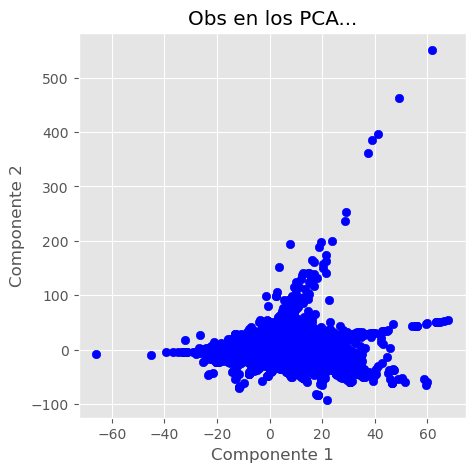

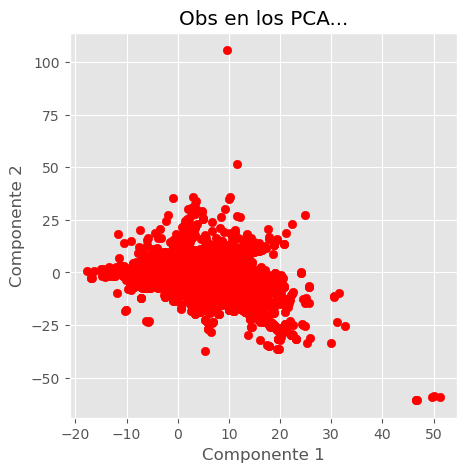

In [124]:
colores = create_feature[params['target']].replace(1,'red').replace(0,'blue').values.tolist()
colores = np.array(colores)
for c in np.unique(colores).tolist():
    plt.figure(figsize=(5,5))
    plt.title('Obs en los PCA...')
    interes = colores== c
    plt.style.use('ggplot')
    plt.scatter(componentes[1][interes],componentes[2][interes], c = c) #colores.tolist()
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()

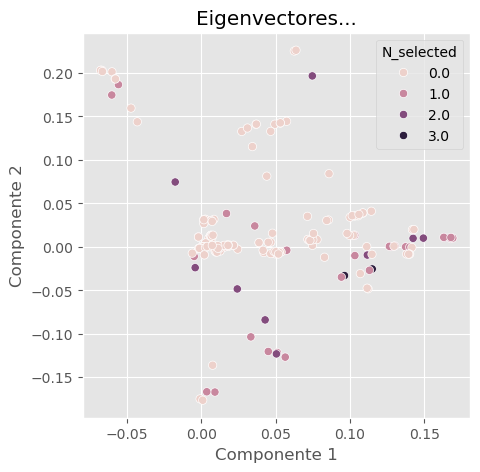

In [125]:
eigen_vectors = pd.DataFrame(pca_model.components_, columns = dataset.columns.tolist())
eigen_vectors.index = eigen_vectors.index+1
componentes.columns = eigen_vectors.index

eigen_vectors_plot = (caracteres_modelos.shape[1] - caracteres_modelos.isnull().sum(axis = 1)).to_frame()
eigen_vectors_plot.columns = ['N_selected']
eigen_vectors_plot = pd.concat([eigen_vectors_plot,eigen_vectors.T], axis = 1)
plt.figure(figsize=(5,5))
plt.title('Eigenvectores...')
plt.style.use('ggplot')
sns.scatterplot(eigen_vectors_plot.fillna(0), x = 1, y = 2, hue = 'N_selected')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [126]:
umbral_eigenvec = 0.4

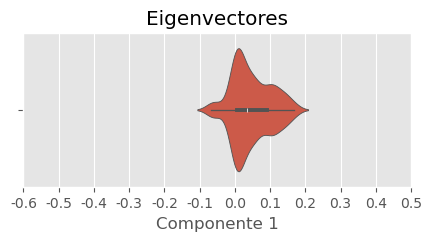

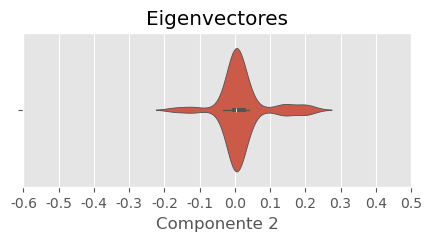

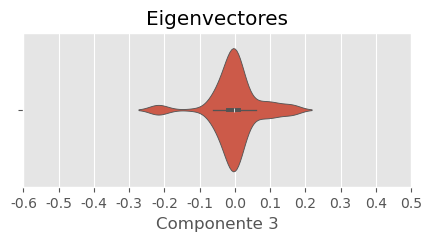

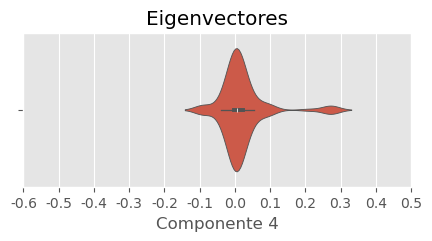

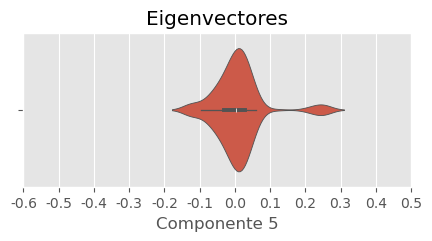

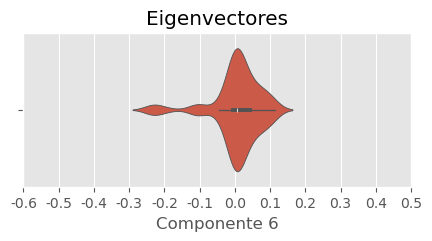

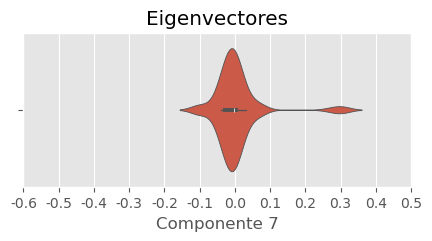

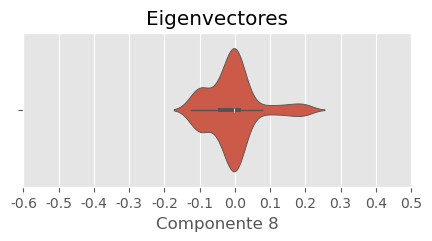

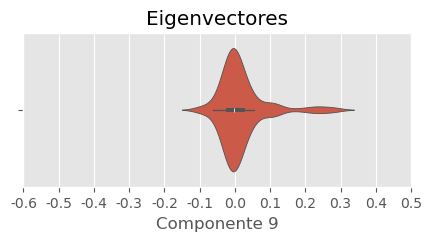

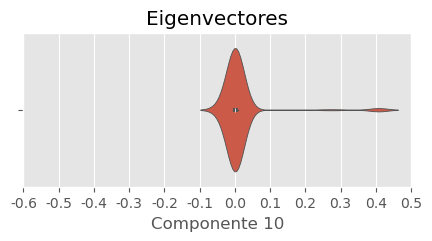

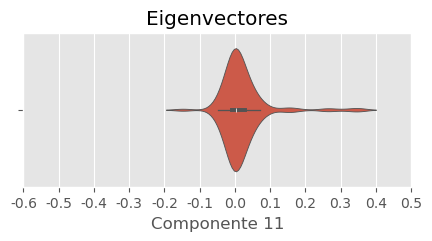

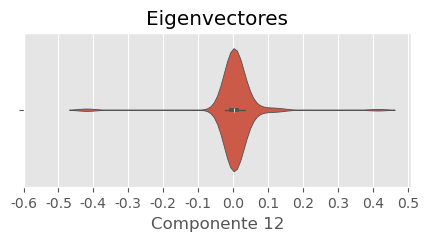

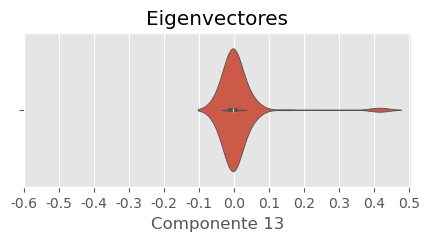

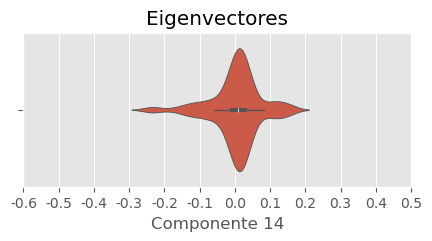

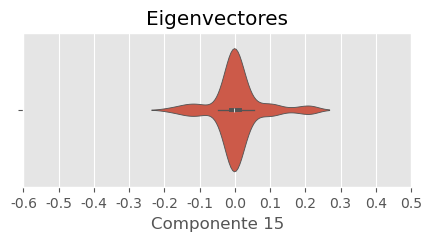

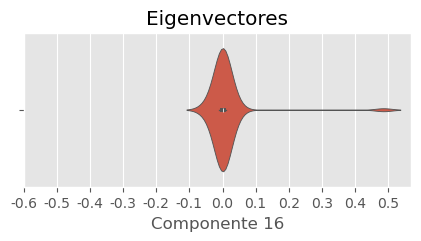

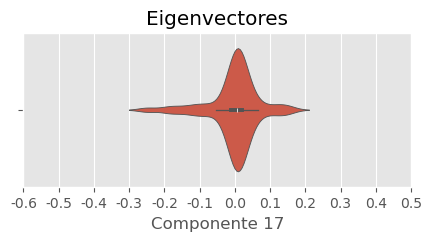

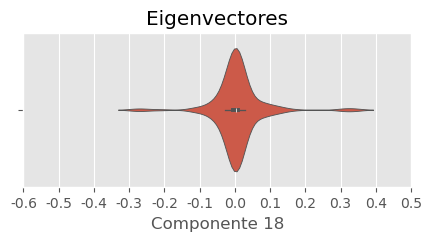

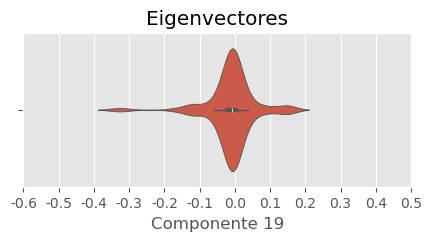

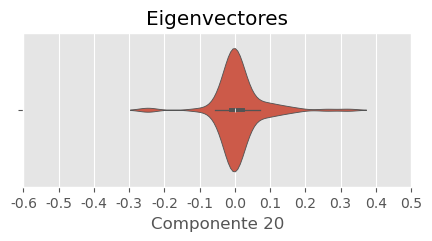

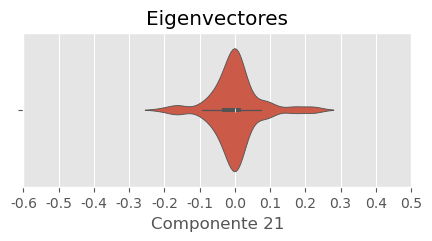

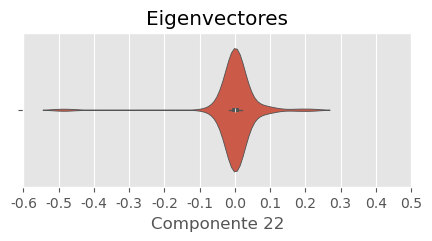

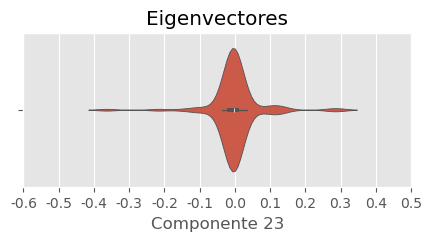

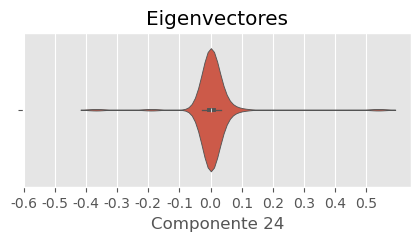

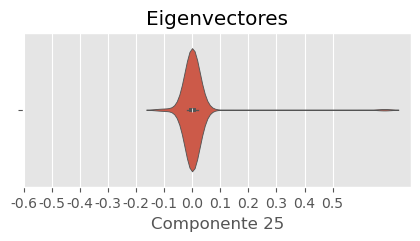

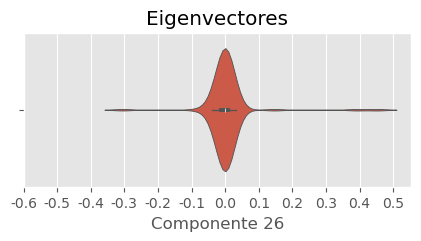

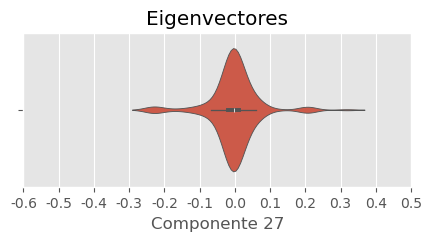

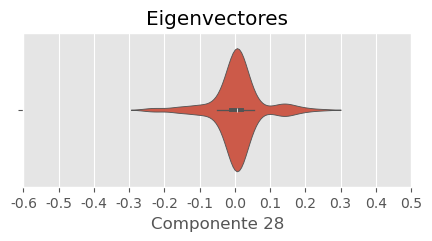

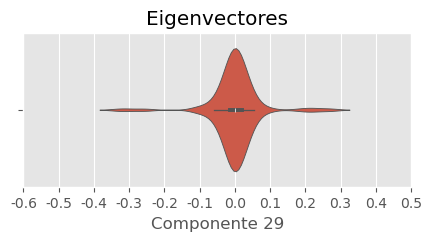

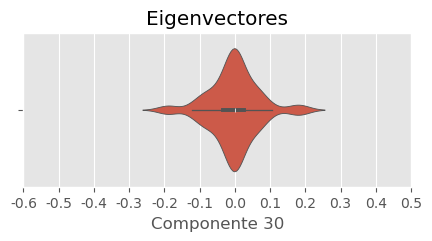

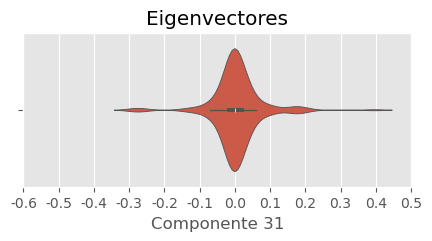

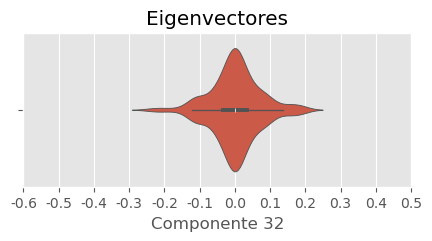

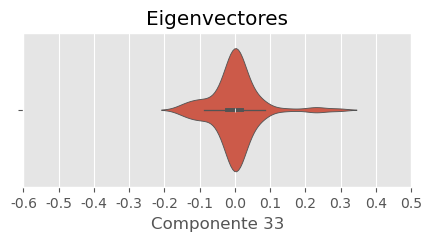

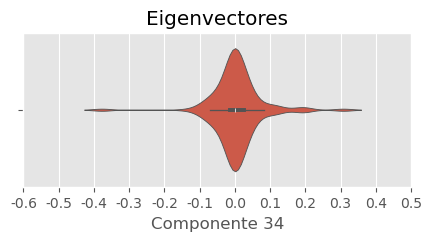

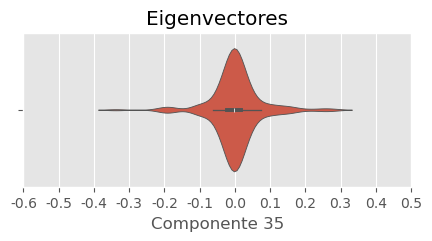

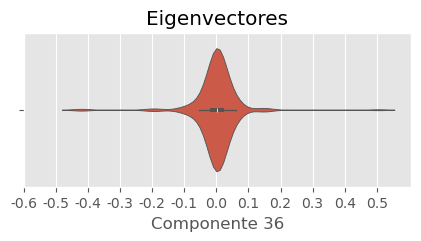

(30, 36)
(64, 36)


In [127]:
res_eigen = pd.DataFrame()
res_eigen1 = pd.DataFrame()

for comp in range(1,eigen_vectors.shape[0]+1,1):
    view = eigen_vectors.loc[comp]
    plt.figure(figsize=(5,2))
    plt.title('Eigenvectores')
    plt.style.use('ggplot')
    sns.violinplot(view, orient='h')
    plt.xlabel(f'Componente {comp}')
    plt.xticks(np.array(list((range(-6,6,1))))/10,np.array(list((range(-6,6,1))))/10)
    plt.show()
    res_eigen = pd.concat([res_eigen,view[view.abs() > umbral_eigenvec]], axis =1)
    res_eigen1 = pd.concat([res_eigen1,view.abs().sort_values(ascending= False).head(2)], axis = 1)
print(res_eigen.shape)
print(res_eigen1.shape)

In [128]:
print('Variables numericas de impacto y linealmente relevantes: ',res_eigen1.shape[0])
res_eigen1.head()

Variables numericas de impacto y linealmente relevantes:  64


,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
ah_sum_monto_trx_credito_mean_6,0.169107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ah_sum_monto_trx_credito_mean_3,0.167851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_prod_pasivos,NaN,0.226206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_pasivos_prev,NaN,0.225241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
viv_cant,NaN,NaN,0.223672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
print('Variables numericas de impacto y linealmente relevantes: ',res_eigen.shape[0])
res_eigen.head()

Variables numericas de impacto y linealmente relevantes:  30


,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
micro_sum_monto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
micro_sum_cuota_pactada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.409165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
micro_sum_saldo_corte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.410844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
micro_sum_saldo_promedio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.412893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
periodo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


for comp in range(1,componentes.shape[1]+1,1):
    df_temp = componentes[comp]
    df_temp.index = create_feature.index
    df_temp = pd.concat([create_feature['periodo'],df_temp], axis = 1).groupby('periodo').sum().reset_index()
    plt.figure(figsize=(10,2))
    plt.title('Eigenvectores')
    plt.style.use('ggplot')
    plt.scatter(df_temp['periodo'],df_temp[comp], label = comp)
    #plt.xticks(create_feature['periodo'].unique(),create_feature['periodo'].unique(), rotation =45)
    plt.xlabel(f'Componente {comp}')
    plt.show()

In [130]:
## PCA
componentes1,pca_model1 = PCA_m(X_train_standard.values,0.8)
componentes1 = pd.DataFrame(componentes1)

Numero de componentes:  297


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 ## PCA                                                                                       │
│ ❱ 2 componentes1,pca_model1 = PCA_m(X_train_standard.values,0.8)                                 │
│   3 componentes1 = pd.DataFrame(componentes1)                                                    │
│   4                                                                                              │
│                                                                                                  │
│ in PCA_m:6                                                                                       │
│                                                                                                  │
│    3 │   for i in range(2):                                                                      │
│    4 │   │   print("Numero de componentes: ",n)                                                  │
│    5 │   │   pca_model = PCA(n_components=n)                                                     │
│ ❱  6 │   │   X_reduced = pca_model.fit_transform(X)                                              │
│    7 │   │   # Obtener la varianza explicada acumulada                                           │
│    8 │   │   varianza_acumulada = np.cumsum(pca_model.explained_variance_ratio_)                 │
│    9 │   │   varianza_acumulada = np.array(varianza_acumulada)                                   │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/utils/_set │
│ _output.py:273 in wrapped                                                                        │
│                                                                                                  │
│   270 │                                                                                          │
│   271 │   @wraps(f)                                                                              │
│   272 │   def wrapped(self, X, *args, **kwargs):                                                 │
│ ❱ 273 │   │   data_to_wrap = f(self, X, *args, **kwargs)                                         │
│   274 │   │   if isinstance(data_to_wrap, tuple):                                                │
│   275 │   │   │   # only wrap the first output for cross decomposition                           │
│   276 │   │   │   return_tuple = (                                                               │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/base.py:13 │
│ 51 in wrapper                                                                                    │
│                                                                                                  │
│   1348 │   │   │   │   │   prefer_skip_nested_validation or global_skip_validation               │
│   1349 │   │   │   │   )                                                                         │
│   1350 │   │   │   ):                                                                            │
│ ❱ 1351 │   │   │   │   return fit_method(estimator, *args, **kwargs)                             │
│   1352 │   │                                                                                     │
│   1353 │   │   return wrapper                                                                    │
│   1354                                                                                           │
│                                                            

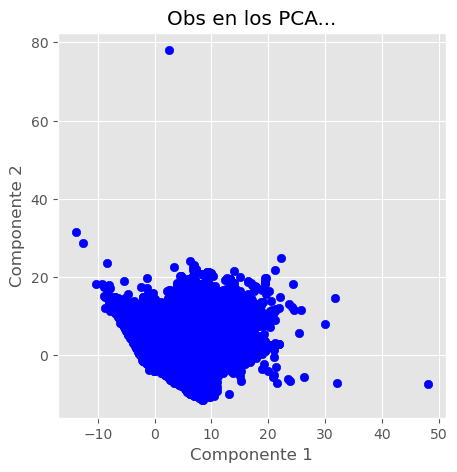

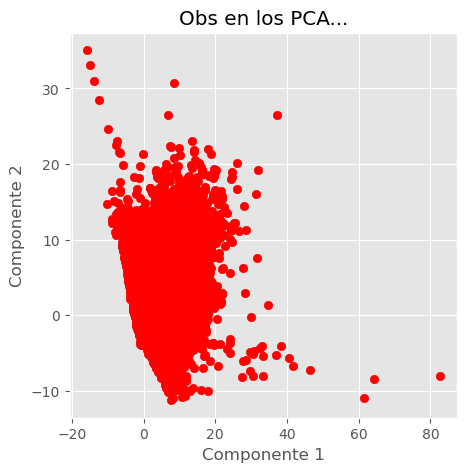

In [93]:
colores = create_feature[params['target']].replace(1,'red').replace(0,'blue').values.tolist()
colores = np.array(colores)
for c in np.unique(colores).tolist():
    plt.figure(figsize=(5,5))
    plt.title('Obs en los PCA...')
    interes = colores== c
    plt.style.use('ggplot')
    plt.scatter(componentes1[1][interes],componentes1[2][interes], c = c) #colores.tolist()
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()

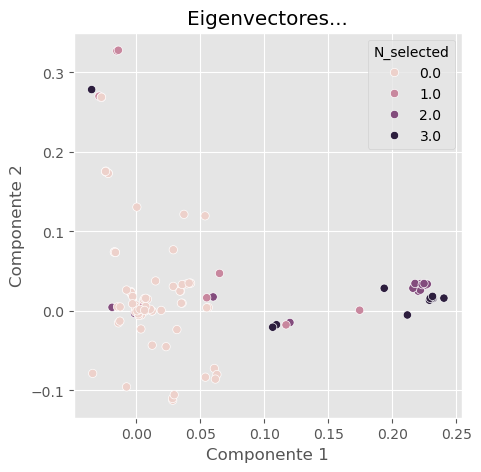

In [94]:
eigen_vectors1 = pd.DataFrame(pca_model1.components_, columns = X_train_standard.columns.tolist())
eigen_vectors1.index = eigen_vectors1.index+1
componentes1.columns = eigen_vectors1.index

eigen_vectors_plot = (caracteres_modelos.shape[1] - caracteres_modelos.isnull().sum(axis = 1)).to_frame()
eigen_vectors_plot.columns = ['N_selected']
eigen_vectors_plot = pd.concat([eigen_vectors_plot,eigen_vectors1.T], axis = 1)
plt.figure(figsize=(5,5))
plt.title('Eigenvectores...')
plt.style.use('ggplot')
sns.scatterplot(eigen_vectors_plot.fillna(0), x = 1, y = 2, hue = 'N_selected')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [95]:
umbral_eigenvec1 = 0.3

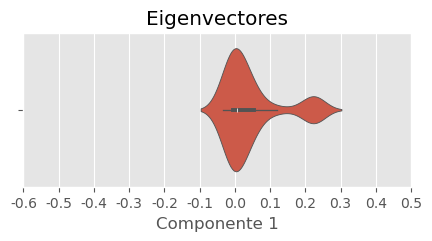

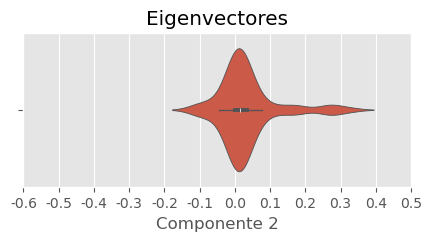

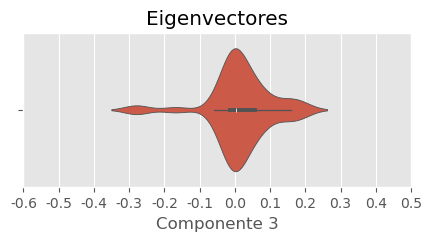

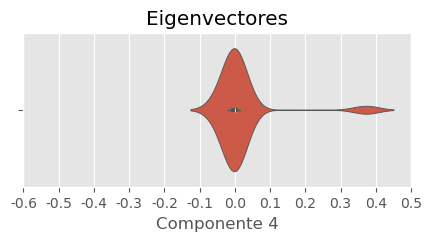

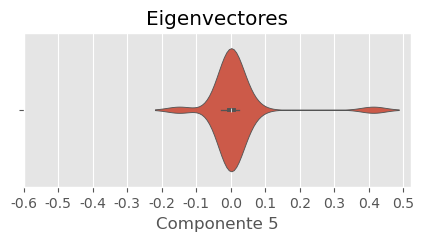

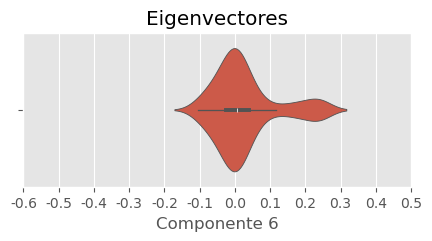

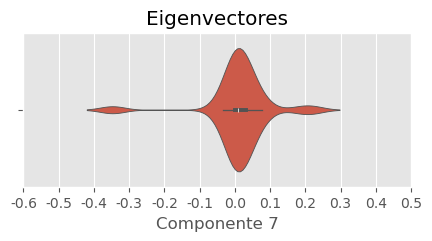

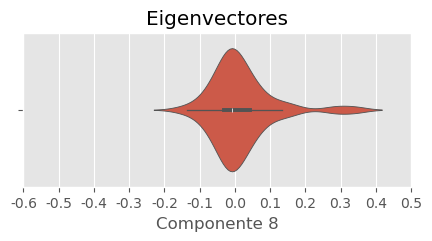

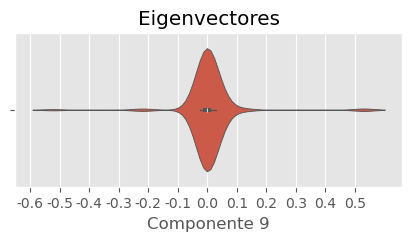

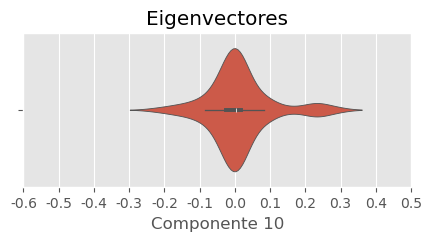

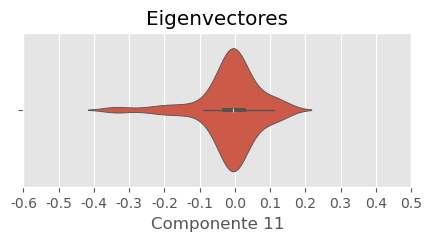

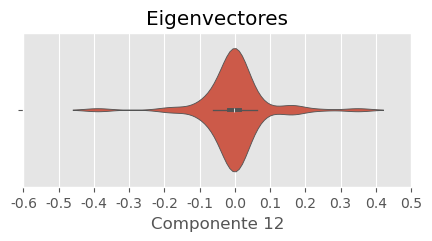

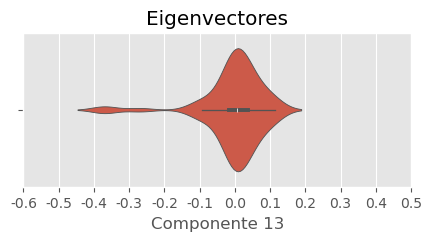

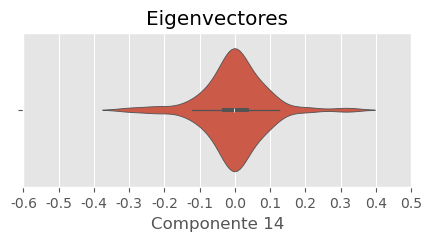

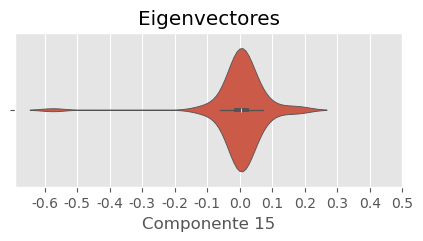

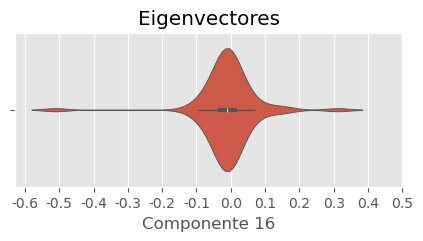

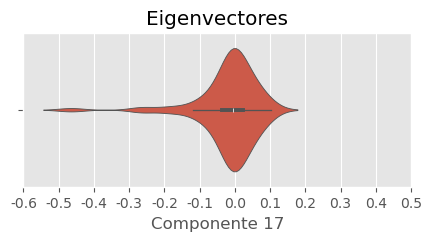

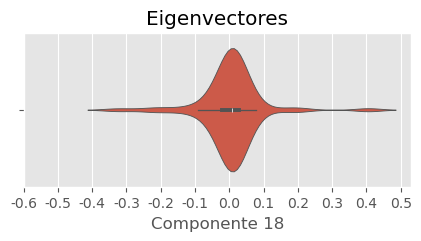

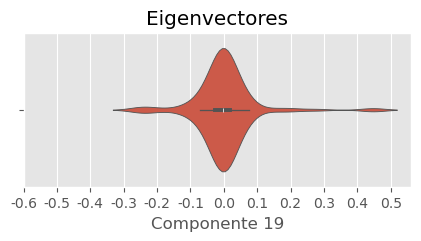

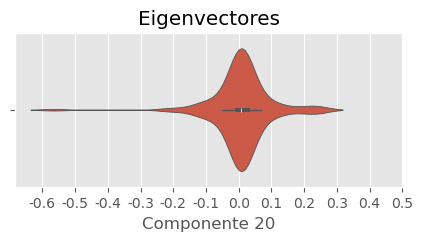

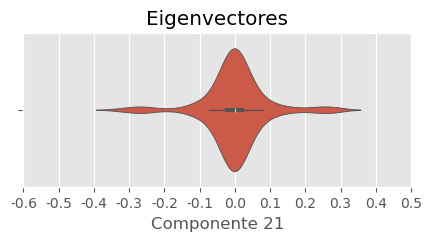

(44, 21)
(35, 21)


In [96]:
res_eigen2 = pd.DataFrame()
res_eigen12 = pd.DataFrame()

for comp in range(1,eigen_vectors.shape[0]+1,1):
    view1 = eigen_vectors1.loc[comp]
    plt.figure(figsize=(5,2))
    plt.title('Eigenvectores')
    plt.style.use('ggplot')
    sns.violinplot(view1, orient='h')
    plt.xlabel(f'Componente {comp}')
    plt.xticks(np.array(list((range(-6,6,1))))/10,np.array(list((range(-6,6,1))))/10)
    plt.show()
    res_eigen2 = pd.concat([res_eigen2,view1[view1.abs() > umbral_eigenvec1]], axis =1)
    res_eigen12 = pd.concat([res_eigen12,view1.abs().sort_values(ascending= False).head(2)], axis = 1)
print(res_eigen2.shape)
print(res_eigen12.shape)

#### Resumen Variables Importantes

In [133]:
caracteres_modelos.shape

(58, 3)

In [134]:
for col in caracteres_modelos:
    print('Drop:',col,'values: ',caracteres_modelos.drop(col, axis = 1).dropna(how='all').shape)
    

Drop: NN_Olden values:  (45, 2)
Drop: Importance values:  (46, 2)
Drop: X1 values:  (40, 2)


In [128]:
catalog.load("master_feature_fp")

[11/22/24 22:17:04] INFO     Loading data from 'master_feature_fp' (ParquetDataSet)...          ]8;id=305331;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=540299;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

,ah_target_ap_group3
8,0
9,0
12,0
18,0
22,0
...,...
21741157,1
21741173,1
21741175,1
21741185,1


In [131]:
last_model = catalog.load("feature_selected_list")

[11/22/24 22:23:12] INFO     Loading data from 'feature_selected_list' (ParquetDataSet)...      ]8;id=208344;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=648977;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [132]:
last_model.head()

,Feature,Importance
40,ah_sum_monto_trx_debito_mean_6,0.442607
1,periodo,0.140316
83,ah_sum_monto_trx_debito_mean_2,0.071492
90,mes,0.070382
35,ah_sum_monto_trx_debito_mean_3,0.057718


In [133]:
real_name = []
for col in last_model['Feature']:
    if col in caracteres_modelos.index:
        real_name.append(col)
real_name


[
    'ah_sum_monto_trx_debito_mean_6',
    'periodo',
    'ah_sum_monto_trx_debito_mean_2',
    'ah_sum_monto_trx_debito_mean_3',
    'ah_cant',
    'ah_sum_monto_trx_debito_std_3',
    'ah_sum_cantidad_trx_debito',
    'ah_sum_monto_trx_credito_std_6',
    'ah_sum_monto_trx_credito_mean_6',
    'viv_cant_prev',
    'ah_sum_saldo_corte',
    'viv_sum_saldo_corte',
    'ah_cant_prev',
    'ah_sum_monto_trx_debito_std_6',
    'ah_sum_monto_trx_credito',
    'ah_sum_monto_trx_credito_mean_3',
    'delta_ah_sum_monto_trx_credito',
    'antiguedad_meses',
    'sum_saldo_pasivos',
    'otras_ord_cant_prev',
    'delta_ah_sum_monto_trx_debito',
    'ah_sum_monto_trx_credito_std_3',
    'vlr_ing_bru_mes',
    'ah_sum_monto_trx_credito_mean_2',
    'viv_sum_cuota_pactada',
    'ah_sum_monto_trx_debito',
    'ah_sum_saldo_promedio_mean_3',
    'viv_cant',
    'num_prod_activos',
    'ah_sum_saldo_promedio',
    'num_pasivos_prev',
    'ah_sum_saldo_promedio_mean_6',
    'num_activos_prev',
   

In [117]:
variables_pca = []
for bd in [res_eigen,res_eigen2]:
    variables_pca = list(set(variables_pca + bd.index.tolist()))
t = 0
for col in variables_pca:
    if col in caracteres_modelos.index:
        t = t + 1
        #print(col)
(t,len(variables_pca),t/len(variables_pca))

(10, 48, 0.20833333333333334)

In [116]:
variables_pca = []
for bd in [res_eigen1,res_eigen12]:
    variables_pca = list(set(variables_pca + bd.index.tolist()))
t = 0
for col in variables_pca:
    if col in caracteres_modelos.index:
        t = t + 1
        #print(col)
(t,len(variables_pca),t/len(variables_pca))

(17, 50, 0.34)

In [115]:
variables_pca = []
for bd in [res_eigen,res_eigen1,res_eigen2,res_eigen12]:
    variables_pca = list(set(variables_pca + bd.index.tolist()))
t = 0
for col in variables_pca:
    if col in caracteres_modelos.index:
        t = t + 1
        #print(col)
(t,len(variables_pca),t/len(variables_pca))

(18, 62, 0.2903225806451613)